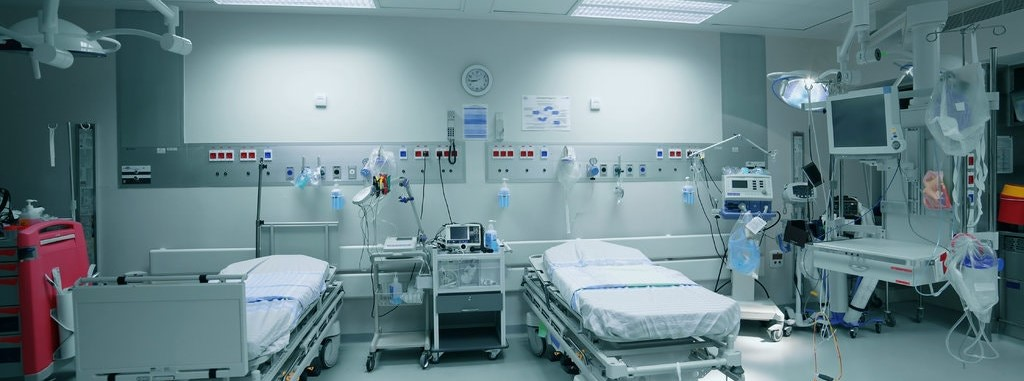

Note :

       This Notebook is for beginners who are new to data science .
       In here I will try to cover the basics how a project is maintained from start to end.
       Before starting this I recommend to understand basic in-built functions of Python related to data science.
       And after all try to analyze every single cell and don't copy the code rather try to fork and edit it as per your usage.
       
       
 **Thank You**

# Libraries

When it is time to code, it is easier to use library function that help us gain time in short or mid-range time based competitions.
Otherwise we have to write large codes 

In [ ]:
# for visualization -------------------

import matplotlib.pyplot as plt
import seaborn as srn

# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*

# for prediction (machine learning models) ------------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

# Data gathering and basic visualization

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df=pd.read_csv('/kaggle/input/insurance/insurance.csv')
print(df.head())

In [ ]:
print('shape of the dataset is :',df.shape)

Dataset is medium in size and this size is quite good for predicting

# Pre-processing

Preprocessing is done in some steps ---

                                 1. Checking leakages 
                                 2. Filling leakages (if any)
                                 3. Searching unnecessary column/row for deletion
                                 4. Unnecessary column/row deletion (if any)
                                 5. Encoding (if any)

1. **Checking leakages  :**

In [ ]:
l1=df.isnull()
for col in l1.columns:
    print('leakage in '+col+' is :  ',len(l1[l1[col]==True]))

It is great that this data is leakage - free. 

So, we don't have to replace or fill any leakages 

3. Searching unnecessary column/row for deletion :

In [ ]:
for col in df.columns:
    print(col,end=" ")

As every single column are pairwise unique , so deleting any data would shorten the tarining data and increase loss in prediction

5. Encoding :

Checking the type of the columns :

In [ ]:
colm=[]
for col in df.columns:
    print('type of '+col+' is : ',df[col].dtypes)
    colm.append(col)

For prediction purposes we have to change the object/categorical data into numerical data .
We need encoding for that.

In [ ]:
a=df['sex'].value_counts()
print('index  count')
print(a)
print('\n\n')
b=df['smoker'].value_counts()
print('index  count')
print(b)
print('\n\n')
c=df['region'].value_counts()
print(' index      count')
print(c)

In [ ]:
#   'sex' column encoding
k=0
for i in a.index:
    df['sex'].replace(i,k,inplace=True)
    k+=1

#   'smoker' column encoding

k=0
for i in b.index:
    df['smoker'].replace(i,k,inplace=True)
    k+=1

#   'region' column encoding

k=0
for i in c.index:
    df['region'].replace(i,k,inplace=True)
    k+=1
df

# Data visualization ( visual prediction )

Now we will see the how the charges change as per features.

In [ ]:
charge=df['charges']
charge

In [ ]:
age=df['age']
plt.title('age vs. charges')
plt.xlabel('age')
plt.ylabel('charges')
plt.scatter(age,charge,s=5)
plt.show()

It is visible the charges are in 3 ranges ,as well as the charges are incrasing with increasing age.

In [ ]:
bmi=df['bmi']
plt.title('bmi vs. charges')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.scatter(bmi,charge,s=5)
plt.show()

Charges are averaging in a lower 15000s , still there are not so few charges crossing 40000 barrier.

These could be the severe cases.

In [ ]:
children=df['children']
plt.title('children vs. charges')
plt.xlabel('children')
plt.ylabel('charges')
plt.scatter(children,charge,s=5)
plt.show()

People with less children are facing more bills aka they're having severe problems than others.

It concludes that people are much fit who has more children or should we say that it is vice-cersa ??   XD

In [ ]:
sex=df['sex']
smoker=df['smoker']
confusion_matrix=pd.crosstab(sex, smoker, rownames=['sex'], colnames=['smoker'])
srn.heatmap(confusion_matrix, annot=True)
plt.show()

male-0 female-1

non_smoker-0 smoker-1



It is clearly visible that non-smokers are bigger in number .

and as well as men are bigger in number being a smoker

**This is an *additional conclusion* of the data**

In [ ]:
reg=df['region']
plt.figure(figsize=(10,5))
plt.scatter(charge,reg,s=2)
plt.title('region vs charges')
plt.xlabel('charges')
plt.ylabel('region label')
plt.show()

Moreover it is seen that severs cases are low in number in every region.

# Pipeline

In [ ]:
xx=np.arange(1,len(df)+1,1)
plt.scatter(xx,df['age'])

As the data looks like quite shuffled so we are not doing **random reshuffling**.

Creating X and Y for prediction

In [ ]:
X_df=df.drop('charges',1)
y_df=df['charges']

In [ ]:
print('shape of X :',X_df.shape)
print('shape of Y :',y_df.shape)

As we have to predict this model and we don't have any test data we are going to split the data into train and test

The data is short in size so we are going to do a 80%-20% train-test split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_df,y_df,test_size=0.2)
print('shape of X_train :',X_train.shape)
print('shape of X_test :',X_test.shape)
print('shape of y_train :',y_train.shape)
print('shape of y_test :',y_test.shape)

* ***prediction with regression models*** 

* Ridge Regression

In [ ]:
alp=np.arange(0.1,1.1,0.1)
arr=[]
ar1=[]
for i in alp:
    clf=Ridge(alpha=i)
    clf.fit(X_train,y_train)
    m=clf.score(X_train,y_train)
    print('alpha : ',i,'    accuracy : ',m)
    arr.append(m)
plt.plot(arr)
plt.title('                                        training model accuracy with Ridge Regression')
plt.xlabel('alpha')
plt.ylabel('accuracy')

We can see increase of the value of alpha decreases the model accuracy over the training data.

In [ ]:
mm=[]
for i in alp:
    model=Ridge(alpha=i)
    model.fit(X_train,y_train)
    y_pr=model.predict(X_test)
    xx=np.sqrt(mean_squared_error(y_test,y_pr))
    mm.append(xx)
    print('RMSE for '+str(i)+' is :',xx)
plt.plot(mm)
plt.title('RMSE on Ridge model (testing data)')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.show()

The increase in alpha may lower the accuracy a bit , but it enhances the test accuracy

In [ ]:
arrr=np.arange(1,len(y_test)+1,1)
plt.scatter(arrr,y_test,label='true',color='b',s=5)
plt.legend()
plt.scatter(arrr,y_pr,label='predicted',color='g',s=5)
plt.legend()
plt.title('true vs predicted ')
plt.ylabel('charges')
plt.show()

In [ ]:
print(' best accuracy with ridge regression on training data :',max(arr))
print(' least RMSE with ridge regression on testing data :',min(mm))

* Lasso Regression

In [ ]:
arr=[]
ar1=[]
for i in alp:
    clf=Lasso(alpha=i)
    clf.fit(X_train,y_train)
    m=clf.score(X_train,y_train)
    print('alpha : ',i,'    accuracy : ',m)
    arr.append(m)
plt.plot(arr)
plt.title('                                        training model accuracy with Lasso Regression')
plt.xlabel('alpha')
plt.ylabel('accuracy')

In [ ]:
mm=[]
for i in alp:
    model=Lasso(alpha=i)
    model.fit(X_train,y_train)
    y_pr=model.predict(X_test)
    xx=np.sqrt(mean_squared_error(y_test,y_pr))
    mm.append(xx)
    print('RMSE for '+str(i)+' is :',xx)
plt.plot(mm)
plt.title('RMSE on Lasso model (testing data)')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.show()

The lasso and ridge model showed similar gesture

In [ ]:
arrr=np.arange(1,len(y_test)+1,1)
plt.scatter(arrr,y_test,label='true',color='b',s=5)
plt.legend()
plt.scatter(arrr,y_pr,label='predicted',color='g',s=5)
plt.legend()
plt.title('true vs predicted ')
plt.ylabel('charges')
plt.show()

In [ ]:
print(' best accuracy with ridge regression on training data :',max(arr))
print(' least RMSE with ridge regression on testing data :',min(mm))

* Polynomial Regression

In [ ]:
print('shape of X_train',X_train.shape)

For polynomial regression we we have 6 features to works on. 

So degree of polynomial regression will be better if we do it under 6. Otherwise it will overfit the training data.

In [ ]:
tr=[]
ts=[]
for i in range(10):
    model=make_pipeline(PolynomialFeatures(i+1),LinearRegression())
    model.fit(X_train,y_train)
    x1=model.score(X_train,y_train)
    y_pr=model.predict(X_test)
    x2=np.sqrt(mean_squared_error(y_test,y_pr))
    tr.append(x1)
    ts.append(x2)
    print('tarining accuracy with '+str(i+1)+' degree  :',x1)
    print('RMSE with '+str(i+1)+' degree  :',x2)

In [ ]:
plt.plot(tr)
plt.title('accuracy in training model')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.show()
plt.plot(ts)
plt.title('accuracy in testing model')
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.show()

In [ ]:
for i in range(len(tr)):
    print('degree '+str(i+1)+'  : ',ts[i]/tr[i])

Our hypothesis worked as predicted. The RMSE increased after we overfit the data (degree>6). the **degree = 6** is th best for it.

In [ ]:
print('accuracy of the best fitted model by Polynomial Regression :',tr[5])
print('RMSE of the best fitted model by Polynomial Regression :',ts[5])

* Random Forest Regression

In [ ]:
model=RandomForestRegressor(random_state=0)   
model.fit(X_train,y_train)
y_pr=model.predict(X_test)
print('RMSE of randomforest regression model  :',np.sqrt(mean_squared_error(y_test,y_pr)))
print('accuracy of the training data with randomforest regression model : ',model.score(X_train,y_train))

Conclusion :

   **Model Accuracy** : RandomForestRegressor > Ridge Regressor > Lasso Regressor > PolynomialRegressor
             

# Creating Output file

* Making output 

In [ ]:
id1=np.arange(1,len(y_test)+1,1)
x=pd.DataFrame({'id': id1,'charges':y_pr})


Generating ***output*** file

In [ ]:
x.to_csv('submission.csv',index=False)

This is the **generalized method** how you interpret a **data science prediction-based project**.

# UPVOTE if you like the kernel  :)

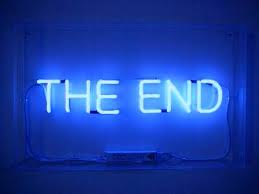